In [1]:
!pip install BeautifulSoup4
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
import pickle
from collections import Counter

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


# Loading data and creating dataset

In [2]:
train_ann_path = '../input/medical-mask-dataset/Dataset/Medical_Masks_Dataset/xml_labels'
test_ann_path = '../input/medical-mask-dataset/Dataset/Medical_Masks_Dataset/test_images/test_xml_labels'
train_image_path = '../input/medical-mask-dataset/Dataset/Medical_Masks_Dataset/images'
test_image_path = '../input/medical-mask-dataset/Dataset/Medical_Masks_Dataset/test_images'

ann_paths = [train_ann_path, test_ann_path]
image_paths = [train_image_path, test_image_path]

In [3]:
def get_data(ann_path, image_path):
    
    names = os.listdir(ann_path)
    
    labels = []
    images = []

    for i, name in enumerate(names):
        if i % 100 == 0:
            print(i, 'from', len(names))
        path = ann_path + '/' + name
        with open(path, 'r') as file:
            ann = file.read()
            soup = soup = BeautifulSoup(ann)

            image_name = soup.find('filename').text
            path = image_path + '/' + image_name
            image = Image.open(path)
            image = np.array(image)

            objects = soup.findAll('object')
            for obj in objects:
                label = obj.find('name').text
                labels.append(label)

                xmin = int(obj.find('xmin').text)
                ymin = int(obj.find('ymin').text)
                xmax = int(obj.find('xmax').text)
                ymax = int(obj.find('ymax').text)

                obj_image = image[ymin:ymax, xmin:xmax]
                images.append(obj_image)
                
    return images, labels

In [4]:
all_images = []
all_labels = []

for ann_path, image_path in zip(ann_paths, image_paths):
    images, labels = get_data(ann_path, image_path)
    all_images += images
    all_labels += labels

0 from 670
100 from 670
200 from 670
300 from 670
400 from 670
500 from 670
600 from 670
0 from 8


# Checking class sizes

In [6]:
np.unique(all_labels, return_counts=True)

(array(['bad', 'good', 'none'], dtype='<U4'), array([ 667, 3121,  126]))

# Dataset preview

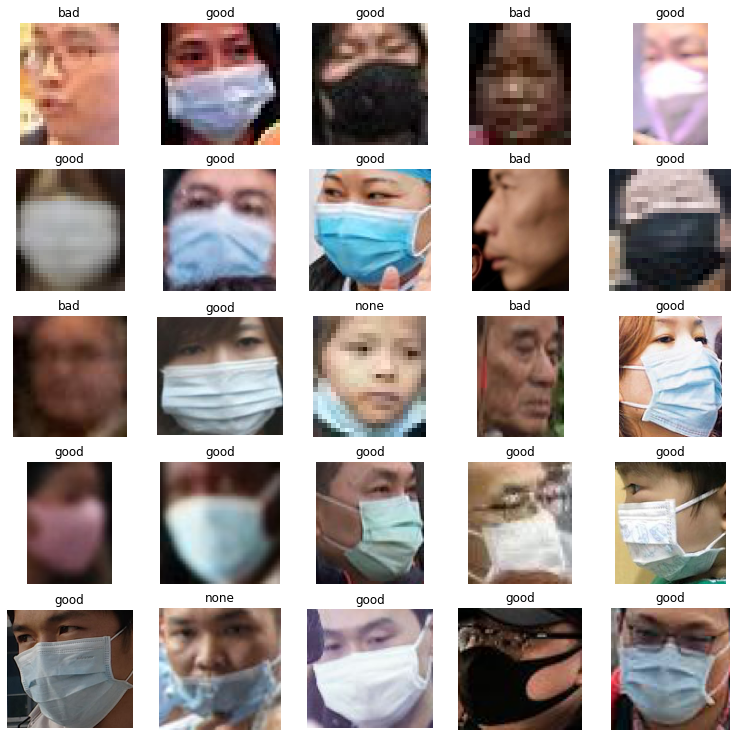

In [13]:
n = 25

random_indices = np.random.choice(len(all_labels), size=n, replace=False)
plt.figure(figsize=(13,13))
for i, idx in enumerate(random_indices):
    image = all_images[idx]
    label = all_labels[idx]
    
    plt.subplot(5, 5, i+1)
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')
plt.show()

# Saving the dataset to a file

In [15]:
with open('MedicalMaskDataset.pkl', 'wb') as file:
    dataset = {'images':all_images, 'labels':all_labels}
    pickle.dump(dataset, file)